In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9697.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_10087.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9618.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9614.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9862.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9838.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9851.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9691.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory

# Define file paths
#train_dir_benign = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign'
#train_dir_malignant = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant'
#test_dir_benign = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign'
#test_dir_malignant = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/malignant'

# Combine directories for simplicity
train_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
test_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'

# Set up ImageDataGenerator for training and testing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2  # Split training data into train and validation sets
)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load validation data
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # You can adjust the number of epochs
)

# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model

Found 7684 images belonging to 2 classes.
Found 1921 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/241 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.7599 - loss: 0.8105 - val_accuracy: 0.8865 - val_loss: 0.3054
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.8817 - loss: 0.2890 - val_accuracy: 0.8626 - val_loss: 0.3577
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.8907 - loss: 0.2675 - val_accuracy: 0.9001 - val_loss: 0.2736
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9040 - loss: 0.2418 - val_accuracy: 0.8969 - val_loss: 0.2517
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9080 - loss: 0.2221 - val_accuracy: 0.8938 - val_loss: 0.2421
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9168 - loss: 0.2054 - val_accuracy: 0.8980 - val_loss: 0.2624
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.9326 - loss: 0.1758 - val_accuracy: 0.8777 - val_loss: 0.2919
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.9332 - loss: 0.1744 - val_accuracy: 0.889

In [3]:
# Save the model
model.save('/kaggle/working/melanoma_classifier.h5')

32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 459ms/step


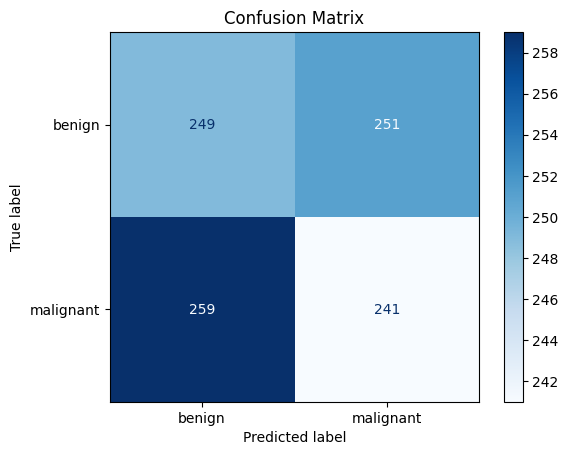

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Get true labels and predictions
test_data.reset()  # Reset the generator to avoid issues with batch iteration
y_true = test_data.classes  # True labels from the test dataset
# Get predictions from the model
y_pred_prob = model.predict(test_data)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Found 1000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step


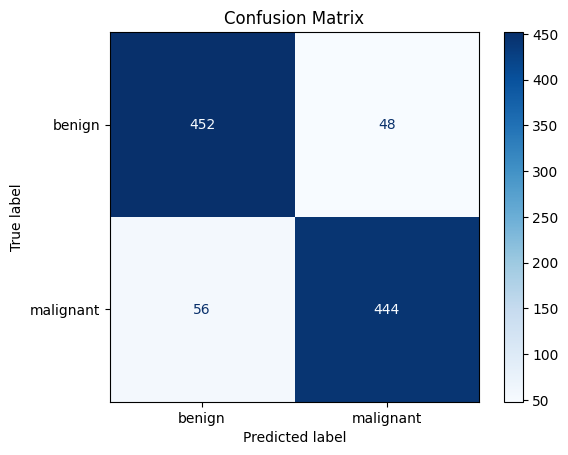

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('/kaggle/working/melanoma_classifier.h5')

# Path to test dataset
test_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Keep order to match predictions with ground truth
)

# Get predictions
predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Get true labels
true_labels = test_data.classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
